<img src="../images/tinap.png" style="float: left; margin: 15px; height: 50px">

# Tina's Project - Ames House Sales Price Prediction

## 03. Model Selection - Linear Regression - Part 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import pickle

### Load Data

In [4]:
df_train = pd.read_csv('../data/train_ready.csv')
df_test = pd.read_csv('../data/test_ready.csv')

In [5]:
df_train.shape

(2047, 98)

In [6]:
df_test.shape

(878, 97)

Found 2 target variables are outliers when I take target variable to log. So, I come back and remove them.

In [7]:
df_train = df_train[np.log(df_train['SalePrice']) >= 10]

### Model 1.1 - X and y

In [8]:
# Set X and y
X = df_train.drop(columns = ['SalePrice', 'Id'])
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2022, 
                                                    train_size = 0.8)
lr = LinearRegression()
lr.fit(X_train, y_train)

r2_train = lr.score(X_train, y_train)
r2_test = lr.score(X_test, y_test)

print(f"Training R2 = {r2_train}")
print(f"Testing R2 = {r2_test}")

cv_mean = cross_val_score(lr, X, y, cv = 5).mean()
print(f"CV Score = {cv_mean}")

Training R2 = 0.8986859588727559
Testing R2 = 0.8746638953395734
CV Score = 0.8806104203579095


##### LINE Assumption

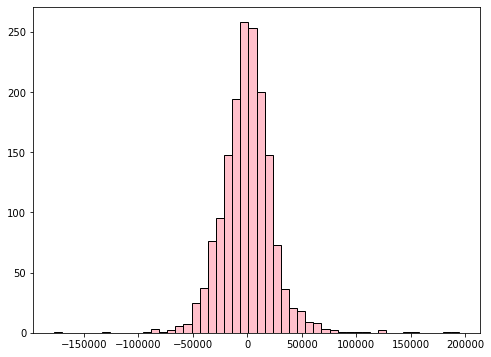

In [9]:
# N - Normality of errors
y_pred = lr.predict(X_train)
resids = y_train - y_pred

plt.figure(figsize = (8, 6))
plt.hist(resids, bins = 50, color = 'pink', edgecolor = 'black');

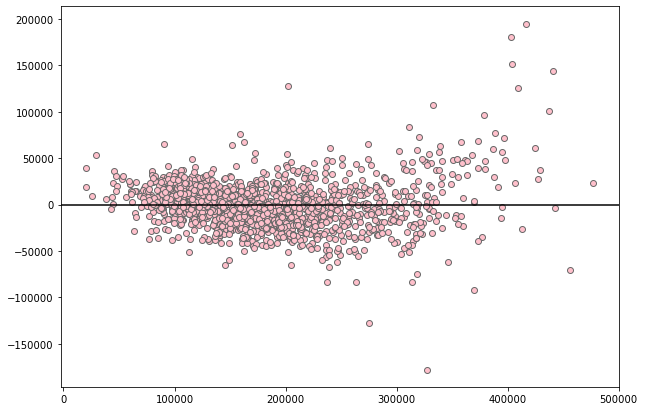

In [10]:
# E - Equal variance of errors
# Residual plot 
plt.figure(figsize = (10, 7))
plt.scatter(y_pred, resids, color = 'pink', edgecolor = 'dimgray')
plt.axhline(0, color = 'black');

### Model 1.2 - X and log( y )

In [11]:
# Set X and y
X = df_train.drop(columns = ['SalePrice', 'Id'])
y_log = np.log(df_train['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y_log, random_state = 2022, 
                                                    train_size = 0.8)
lr_logy = LinearRegression()
lr_logy.fit(X_train, y_train)

r2_train = lr_logy.score(X_train, y_train)
r2_test = lr_logy.score(X_test, y_test)

print(f"Training R2 = {r2_train}")
print(f"Testing R2 = {r2_test}")

cv_mean = cross_val_score(lr_logy, X, y_log, cv = 5).mean()
print(f"CV Score = {cv_mean}")

Training R2 = 0.9121927418797189
Testing R2 = 0.8961430058052525
CV Score = 0.8962822573336616


##### LINE Assumption

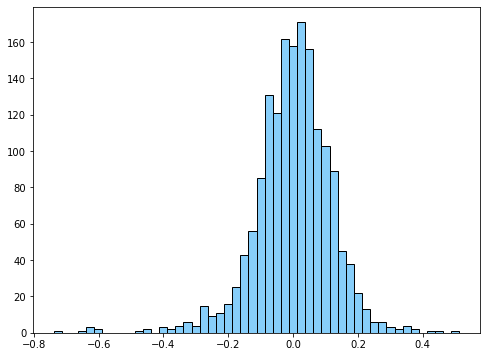

In [12]:
# N - Normality of errors
y_pred = lr_logy.predict(X_train)
resids = y_train - y_pred

plt.figure(figsize = (8, 6))
plt.hist(resids, bins = 50, color = 'lightskyblue', edgecolor = 'black');

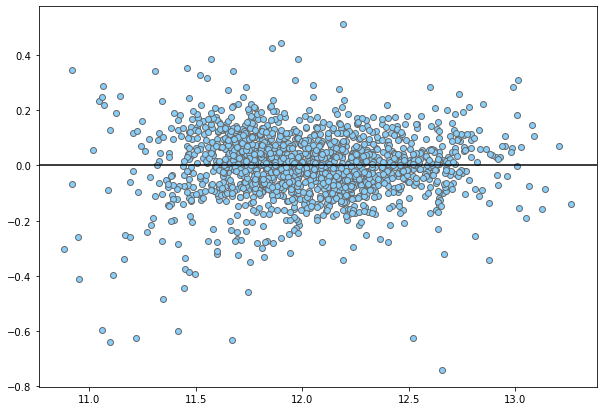

In [13]:
# E - Equal variance of errors
# Residual plot 
plt.figure(figsize = (10, 7))
plt.scatter(y_pred, resids, color = 'lightskyblue', edgecolor = 'dimgray')
plt.axhline(0, color = 'black');

### Summary
Compare this two models, model 1.1 and 1.2, we can see that both models are a little overfit since their testing R-square are lower than their trainning R-square. However, overall, model 1.2 (with y in logarithm) get higher score on both trainning and testing datasets than model 1.1.

### Save Models

In [14]:
pickle.dump(lr, open("model/model_101.model", 'wb'))
pickle.dump(lr_logy, open("model/model_102.model", 'wb'))

---
### Find Significant Features
Source: 
* [find p-value via statsmodels.api](https://www.statsmodels.org/stable/index.html)
* [get p-value in summary table](https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression)

#### Model 1.2

In [17]:
X = sm.add_constant(X)
ols = sm.OLS(np.log(y), X).fit()
p_values = ols.summary2().tables[1]['P>|t|']
ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS              Adj. R-squared:     0.906     
Dependent Variable:  SalePrice        AIC:                -2644.6363
Date:                2022-10-13 00:14 BIC:                -2099.1904
No. Observations:    2045             Log-Likelihood:     1419.3    
Df Model:            96               F-statistic:        205.9     
Df Residuals:        1948             Prob (F-statistic): 0.00      
R-squared:           0.910            Scale:              0.015339  
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                 9.8388   0.0986 99.7606 0.0000  9.6454 10.0323
total_baths           0.0516   0.0050 10.3960 0.0000  0.0419  0.0614
Exter Cond            0.0432   0.0081  5.3561 0.0000  0.0274  0.0591
Bsmt Qual            -0.0004   0.0002 -1.8915 0.0587 -0.0009  0.0000
Bsmt Exposure         0.0134   0.0022  5.9553 0.0000  0.0090  0.0178
Mas Vnr Area          0.0001   0.0000  2.7246 0.0065  0.0000  0.0001
Kitchen Qual          0.0462   0.0065  7.1323 0.0000  0.0335  0.0589
new_house             0.0736   0.0158  4.6718 0.0000  0.0427  0.1045
Overall Qual          0.0651   0.0040 16.4645 0.0000  0.0574  0.0729
Garage Finish         0.0142   0.0201  0.7040 0.4815 -0.0253  0.0537
Garage Area           0.0002   0.0000  7.4218 0.0000  0.0001  0.0002
Garage Qual           0.0456   0.0122  3.7327 0.0002  0.0216  0.0695
total_sqft            0.0002   0.0000 25.7601 0.0000  0.0002  0.0002
Remod                 0.0174   0.0067  2.5933 0.0096  0.0043  0.0306
Heating QC            0.0230   0.0040  5.8148 0.0000  0.0153  0.0308
Fireplace Qu          0.0132   0.0020  6.4835 0.0000  0.0092  0.0172
Pool QC               0.0368   0.0130  2.8331 0.0047  0.0113  0.0624
Garage Type_Attchd    0.0919   0.0311  2.9560 0.0032  0.0309  0.1528
Garage Type_Basment   0.0631   0.0397  1.5884 0.1124 -0.0148  0.1410
Garage Type_BuiltIn   0.1092   0.0334  3.2711 0.0011  0.0437  0.1746
Garage Type_CarPort  -0.0375   0.0491 -0.7647 0.4446 -0.1338  0.0587
Garage Type_Detchd    0.0588   0.0311  1.8930 0.0585 -0.0021  0.1197
Garage Type_No        0.1790   0.0497  3.6001 0.0003  0.0815  0.2765
Lot Shape_IR2         0.0386   0.0181  2.1322 0.0331  0.0031  0.0740
Lot Shape_IR3        -0.0276   0.0455 -0.6064 0.5443 -0.1168  0.0616
Lot Shape_Reg        -0.0154   0.0067 -2.2790 0.0228 -0.0286 -0.0021
Exterior 1st_AsphShn  0.0630   0.1300  0.4847 0.6279 -0.1919  0.3179
Exterior 1st_BrkComm -0.1942   0.0765 -2.5373 0.0112 -0.3443 -0.0441
Exterior 1st_BrkFace  0.0894   0.0274  3.2596 0.0011  0.0356  0.1432
Exterior 1st_CemntBd  0.0518   0.0280  1.8493 0.0646 -0.0031  0.1068
Exterior 1st_HdBoard  0.0315   0.0237  1.3258 0.1851 -0.0151  0.0781
Exterior 1st_MetalSd  0.0336   0.0228  1.4740 0.1406 -0.0111  0.0783
Exterior 1st_Plywood  0.0167   0.0252  0.6615 0.5084 -0.0327  0.0660
Exterior 1st_Stucco   0.0164   0.0331  0.4945 0.6210 -0.0486  0.0813
Exterior 1st_VinylSd  0.0335   0.0231  1.4500 0.1472 -0.0118  0.0788
Exterior 1st_Wd Sdng  0.0137   0.0229  0.6003 0.5484 -0.0312  0.0586
Exterior 1st_WdShing  0.0228   0.0290  0.7852 0.4324 -0.0341  0.0797
Electrical_FuseF     -0.0310   0.0251 -1.2386 0.2156 -0.0802  0.0181
Electrical_FuseP      0.0132   0.0507  0.2597 0.7952 -0.0863  0.1126
Electrical_SBrkr      0.0071   0.0120  0.5926 0.5535 -0.0165  0.0307
Heating_GasW          0.0463   0.0301  1.5372 0.1244 -0.0128  0.1054
Heating_Grav         -0.2682   0.0585 -4.5815 0.0000 -0.3830 -0.1534
Land Contour_HLS      0.0051   0.0219  0.2344 0.8147 -0.0378  0.0481
Land Contour_Low     -0.0061   0.0274 -0.2244 0.8224 -0.0598  0.0475
Land Contour_Lvl     -0.0136   0.0161 -0.8474 0.3969 -0.0452  0.0179
Condition 2_Pos       0.0249   0.0557

In [18]:
sig_xs = [i for i, v in zip(p_values.index, p_values.values) if v <= 0.01]
coef_cols = list(zip(X.columns, ols.summary2().tables[1]['Coef.']))
[(col, round(co, 2)) for col, co in coef_cols if col in sig_xs]

[('const', 9.84),
 ('total_baths', 0.05),
 ('Exter Cond', 0.04),
 ('Bsmt Exposure', 0.01),
 ('Mas Vnr Area', 0.0),
 ('Kitchen Qual', 0.05),
 ('new_house', 0.07),
 ('Overall Qual', 0.07),
 ('Garage Area', 0.0),
 ('Garage Qual', 0.05),
 ('total_sqft', 0.0),
 ('Remod', 0.02),
 ('Heating QC', 0.02),
 ('Fireplace Qu', 0.01),
 ('Pool QC', 0.04),
 ('Garage Type_Attchd', 0.09),
 ('Garage Type_BuiltIn', 0.11),
 ('Garage Type_No', 0.18),
 ('Exterior 1st_BrkFace', 0.09),
 ('Heating_Grav', -0.27),
 ('Neighborhood_BrDale', -0.14),
 ('Neighborhood_Crawfor', 0.09),
 ('Neighborhood_MeadowV', -0.16),
 ('MS Zoning_FV', 0.23),
 ('MS Zoning_RH', 0.2),
 ('MS Zoning_RL', 0.19),
 ('MS Zoning_RM', 0.16),
 ('Central Air_Y', 0.09),
 ('Condition 1_Feedr', 0.06),
 ('Condition 1_Norm', 0.09),
 ('Condition 1_PosA', 0.15),
 ('Condition 1_PosN', 0.12)]